In [1]:
import os
import numpy as np
import pandas as pd
import math
import statistics as stat
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from id3 import Id3Estimator, export_text
from sklearn.cluster import KMeans
from sklearn import tree
import scipy.spatial.distance as dist
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
warnings.simplefilter(action='ignore', category=(FutureWarning, DeprecationWarning))
missing_values = ['n/a', 'na', 'nan', 'N/A', 'NA', 'NaN', 'NAN', '--', 'Missing', 'missing', 'MISSING', 'Unknown',
                  'Weet ik niet', 'None', 'ONBEKEND', '"ontbrekend"', '"onbekend"', 'onbekend']

# Oefening1:
De onderstaande gegevens met betrekking tot de gemiddelde proteïne consumptie
komende van verschillende voedselbronnen door inwoners in 25 Europese landen, kan je terug
vinden op Canvas (Protein consumption in 25 European countries.csv).

1. Plaats de gegevens in een dataframe
2. Geeft de rijen de naam van de landen die in de eerste kolom (variabele) staan.
3. Welke kolommen dien je te verwijderen om een Principale-Componenten Analyse te kunnen uitvoeren? Verwijder eventuele kolommen met de verkeerde meetschaal, kolommen die niet zinvol zijn,….
4. Bekijk de correlaties tussen de variabelen. Zijn de gegevens bruikbaar om er een PrincipaleComponenten Analyse op toe te passen?
5. Voer een Principale-Componenten Analyse uit en interpreteer de resultaten.
6. Zijn er een of meerdere variabelen die uitgesproken doorweegt in het bepalen van de eerste hoofdcomponent? Zo ja welke?
7. Maak een biplot
8. Maak een nieuw dataframe aan waarbij voor de observaties de eerste drie hoofdcomponenten nemen.
9. Pas hier een hiërarchische cluster analyse op toe (euclidische afstand). Vergelijk de resultaten met de resultaten bekomen met een cluster analyse toegepast op de oorspronkelijke variabelen. Vergelijk ook even met de biplot

1. Laad de dataset op.
2. Verwijder de variabelen die niet op ratio schaal werden gemeten evenals rijen met ontbrekende data (NAs)
3. Controleer de veronderstellingen mbt de data waarop de PCA zal worden toegepast (correlatie coëfficiënten)
4. Normaliseer (aka standardiseer) de data
5. Pas de PCA toe
6. Bestudeer de resultaten van de PCA:
    ➢Print de verklaarde variantie + eventuele visualisatie
    ➢Visualiseer de data adhv de eerste twee principale componenten
    ➢Bekijk de coefficienten om impact van een variabele op PCi in te schatten
7. Creër een nieuwe dataset mbv de eerste x principale componenten
8. Pas eventueel een data analyse techniek toe op de nieuwe dataset

In [2]:
df = pd.read_csv('Protein consumption in 25 European countries.csv',delimiter=';',decimal=',',index_col=0)
# df = df.set_index(['Country'])
df

,Red meat,White meat,Eggs,Milk,Fish,Cereals,Starchy food,"Pulses, nuts and oilseeds",Fruit and vegetables,Total
Country,,,,,,,,,,
Albania,10,1,1,9,0.0,42,1,6,2,72
Austria,9,14,4,20,2.0,28,4,1,4,86
Belgium,14,9,4,18,5.0,27,6,2,4,89
Bulgaria,8,6,2,8,1.0,57,1,4,4,91
Czechoslovakia,10,11,3,13,2.0,34,5,1,4,83
Denmark,11,11,4,25,10.0,22,5,1,2,91
East Germany,8,12,4,11,5.0,25,7,1,4,77
Finland,10,5,3,34,6.0,26,5,1,1,91
France,18,10,3,20,6.0,28,5,2,7,99


In [3]:
df.drop('Total',inplace=True,axis=1)

In [4]:
df.corr().abs()
# df.corr().abs().mean().mean()

,Red meat,White meat,Eggs,Milk,Fish,Cereals,Starchy food,"Pulses, nuts and oilseeds",Fruit and vegetables
Red meat,1.000000,0.188510,0.575320,0.544025,0.064911,0.509703,0.153837,0.409889,0.063935
White meat,0.188510,1.000000,0.600955,0.297482,0.197200,0.439419,0.334568,0.672149,0.073293
Eggs,0.575320,0.600955,1.000000,0.613031,0.047808,0.701310,0.412663,0.595194,0.163922
Milk,0.544025,0.297482,0.613031,1.000000,0.162462,0.592492,0.214492,0.623836,0.399775
Fish,0.064911,0.197200,0.047808,0.162462,1.000000,0.517148,0.438684,0.122260,0.229488
Cereals,0.509703,0.439419,0.701310,0.592492,0.517148,1.000000,0.578134,0.636059,0.042293
Starchy food,0.153837,0.334568,0.412663,0.214492,0.438684,0.578134,1.000000,0.495188,0.068357
"Pulses, nuts and oilseeds",0.409889,0.672149,0.595194,0.623836,0.122260,0.636059,0.495188,1.000000,0.351332
Fruit and vegetables,0.063935,0.073293,0.163922,0.399775,0.229488,0.042293,0.068357,0.351332,1.000000


In [5]:
# biopsyZ = StandardScaler().fit_transform(df)
#Beter:
dfZ =pd.DataFrame()
for column in df:
    mean = df[column].mean()
    standev = df[column].std()
    dfZ[column] = (df[column] - mean)/standev

dfZ.index= df.index.values

In [6]:
pca_dim = min(dfZ.shape[1], dfZ.shape[0])
pcamodel = PCA(pca_dim)
principalComponents = pcamodel.fit_transform(dfZ)

In [7]:
print('Verklaarde variantie in %:', pcamodel.explained_variance_ratio_)
print('Verklaarde cumulatieve variantie in %:', np.cumsum(np.round(pcamodel.explained_variance_ratio_, decimals=4)*100))

Verklaarde variantie in %: [0.45505961 0.18054478 0.12059152 0.10055744 0.0474153  0.03854891
 0.02994711 0.01494695 0.01238837]
Verklaarde cumulatieve variantie in %: [45.51 63.56 75.62 85.68 90.42 94.27 97.26 98.75 99.99]


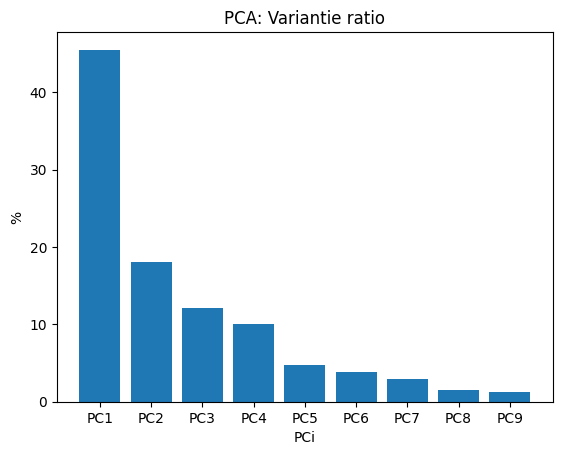

In [8]:
labels_bar = ['PC{}'.format(i) for i in
range(1,pca_dim+1)]

plt.figure()
plt.bar(labels_bar, pcamodel.explained_variance_ratio_ * 100)

plt.title('PCA: Variantie ratio')
plt.xlabel('PCi')
plt.ylabel('%')
plt.show()

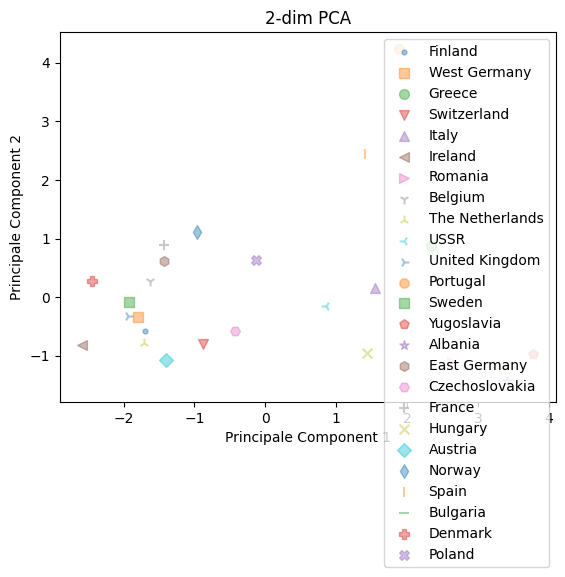

In [9]:
from sympy.physics.control.control_plots import matplotlib

principalDf= pd.DataFrame()
principalDf['PC1'] = principalComponents[:,0]
principalDf['PC2'] = principalComponents[:,1]
principalDf['cat'] = df.index
fig, ax = plt.subplots()
ax.set_xlabel('Principale Component 1')
ax.set_ylabel('Principale Component 2')
ax.set_title('2-dim PCA')
labels_plot = set(principalDf['cat'])
markers = list(matplotlib.markers.MarkerStyle.markers.keys())
for m, l in zip(markers, labels_plot):
    indices = np.where(principalDf['cat'] == l)[0]
    ax.scatter(principalDf.loc[indices, 'PC1'], principalDf.loc[indices, 'PC2'],marker=m, s=50, alpha=0.42)
ax.legend(labels_plot)
# plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

# plt.show()

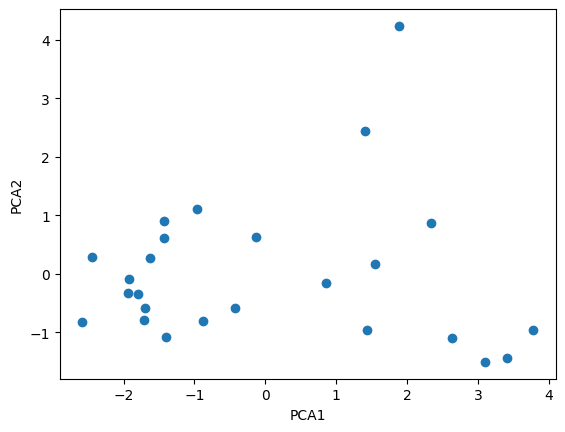

In [10]:
plt.scatter(principalComponents[:,0],principalComponents[:,1])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [11]:
row_labels = ['PC{}'.format(i) for i in range(1,pca_dim+1)]
aij=pd.DataFrame(data=pcamodel.components_,columns = df.columns, index = row_labels)
aij

,Red meat,White meat,Eggs,Milk,Fish,Cereals,Starchy food,"Pulses, nuts and oilseeds",Fruit and vegetables
PC1,-0.310669,-0.315928,-0.420593,-0.378878,-0.134107,0.429829,-0.295962,0.421808,0.122368
PC2,-0.069571,-0.214572,-0.099867,-0.168680,0.651615,-0.253663,0.388885,0.129329,0.503773
PC3,0.355463,-0.628420,-0.080507,0.404144,0.299714,-0.068157,-0.280855,0.140301,-0.340415
PC4,0.596501,0.039612,0.255256,-0.032235,-0.234879,-0.020308,-0.305245,0.251256,0.603769
PC5,0.396586,-0.310600,0.067077,-0.318003,-0.304330,0.185018,0.673174,0.093781,-0.227631
PC6,0.376716,0.081294,-0.664530,-0.017799,0.044765,0.193988,-0.024447,-0.586760,0.158237
PC7,-0.227978,-0.146016,-0.035954,0.717990,-0.236836,0.343064,0.325542,0.031054,0.359412
PC8,0.049688,0.028186,0.467400,-0.102203,0.440552,0.720661,-0.082976,-0.217739,-0.009715
PC9,-0.250675,-0.576604,0.275019,-0.190342,-0.260035,-0.192188,-0.149992,-0.566640,0.211406


In [12]:
col_names = ['PC{}'.format(i) for i in range(1,8)]
new_data = pd.DataFrame(data=principalComponents[:,[0,1,2,3,4,5,6]], columns= col_names)

new_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,3.406217,-1.431872,1.596648,0.084343,0.412439,0.266714,-0.948928
1,-1.396171,-1.078444,-1.234559,0.029192,-0.756463,-0.023798,-0.057586
2,-1.627191,0.273942,0.009164,0.416083,0.910846,0.126926,-0.226839
3,3.099611,-1.503337,-0.082357,0.306607,-0.297087,0.584212,-0.399766
4,-0.427788,-0.574181,-1.159335,-0.219910,0.370131,0.726157,-0.299719
5,-2.442259,0.283050,0.676943,-1.020163,-0.656285,-0.062718,-0.480302
6,-1.424991,0.607825,-1.746831,-0.877103,0.602852,-0.213845,-0.531173
7,-1.700650,-0.582980,1.972677,-1.580717,-0.201145,0.205841,0.973478
8,-1.435430,0.895903,0.161540,1.950533,0.309954,1.475553,0.030086
9,2.329174,0.865466,1.227337,1.757413,-0.657520,-1.009731,0.575383
